# presentation du dataset:
Ce jeu de données semble être extrait d'un classement du bonheur mondial. Chaque ligne représente un pays avec des informations telles que le rang de bonheur, le score de bonheur, le PIB par habitant, la santé (espérance de vie), la liberté, la confiance dans le gouvernement, la générosité, etc. Ces données sont souvent utilisées dans le domaine de la recherche en sciences sociales pour étudier les facteurs qui contribuent au bien-être des individus à l'échelle mondiale. En français, on pourrait les appeler "Les données du Bonheur Mondial".

# objectif de projet:
C'est la prediction de 'Happiness Score' a partir de :  'Family', 'Health (Life Expectancy)', 'Freedom', 'Trus'(Government Corruption)','Generosity', 'Dystopia Residual'
en utilison la regression lineaire multiple.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv("2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [27]:
correlation_matrix = df[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                         'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                         'Dystopia Residual']].corr()
correlation_matrix

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [28]:
from sklearn.model_selection import train_test_split
y=df['Happiness Score']
x=df[['Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
'Generosity', 'Dystopia Residual']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
x_train.shape, x_test.shape

((118, 6), (40, 6))

In [30]:
# Ajout de la constante pour la régression
x_train = sm.add_constant(x_train)

# Création du modèle ajusté sur l'ensemble d'entraînement
lm = sm.OLS(y_train, x_train).fit()

# Affichage du résumé du modèle
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     561.5
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.38e-80
Time:                        22:26:42   Log-Likelihood:                 21.172
No. Observations:                 118   AIC:                            -28.34
Df Residuals:                     111   BIC:                            -8.949
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# interpretation:
Un coefficient de détermination (R-squared) de 0.968 indique que 96.8% de la variance dans les valeurs observées de 'Happiness Score' peut être expliquée par les variables indépendantes  'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', et 'Dystopia Residual') incluses dans votre modèle de régression linéaire multiple.

# representaion graphic:

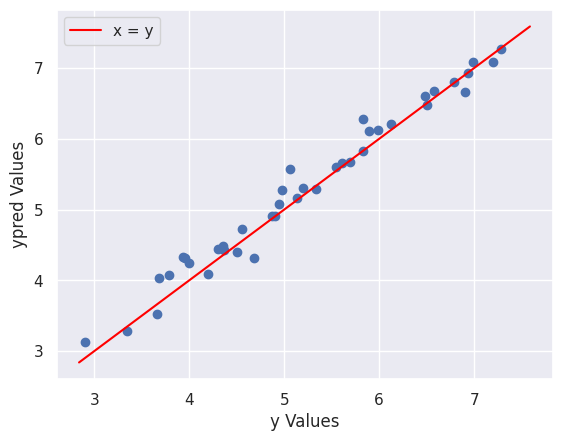

In [34]:
x_test = sm.add_constant(x_test)
y_pred = lm.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('y Values')
plt.ylabel('ypred Values')
# Trace d'une ligne diagonale pour representer y = x a titre de reference
plt.plot(y, y, color='red', label='x = y')
plt.legend()
plt.show()